# VIZ for statistical comparison of errors

In [1]:
import os
import warnings

import geopandas as gpd
import matplotlib.pyplot as plt
import momepy as mm
import numpy as np
import pandas as pd
import scipy.stats

from core import stats, utils

In [10]:
methods_to_compare = [
    "cityseer",
    "osmnx",
    "parenx-voronoi",
    "parenx-skeletonize",
    "neatnet",
]

cartobold = [
    "#7F3C8D",
    "#11A579",
    "#3969AC",
    "#F2B701",
    "#E73F74",
    "#80BA5A",
    "#E68310",
    "#008695",
    "#CF1C90",
    "#f97b72",
    "#4b4b8f",
    "#A5AA99",
]

Read in "combined" table from `statistical_comparison.ipynb`

In [11]:
combined = pd.read_csv("combined.csv")
combined = combined.set_index(["variable", "case"]).sort_index(level=0)
combined.head(3)

original  cityseer     osmnx  parenx-voronoi  \
variable   case                                                        
avg_degree Aleppo       0.682729  0.817101  0.732130        0.846631   
           Auckland     0.439375  0.690336  0.498237        0.742505   
           Bucaramanga  0.675186  0.757766  0.694027        0.862845   

                        parenx-skeletonize   neatnet  
variable   case                                       
avg_degree Aleppo                 0.767441  0.910745  
           Auckland               0.716768  0.803478  
           Bucaramanga            0.835870  0.911149

Make dicts for plotting

In [14]:
cities = list(utils.city_fua.keys())
colors = dict(zip(methods_to_compare, cartobold, strict=False))
xpos = dict(zip(cities, range(len(cities)), strict=False))

**option 1: scatter plots**

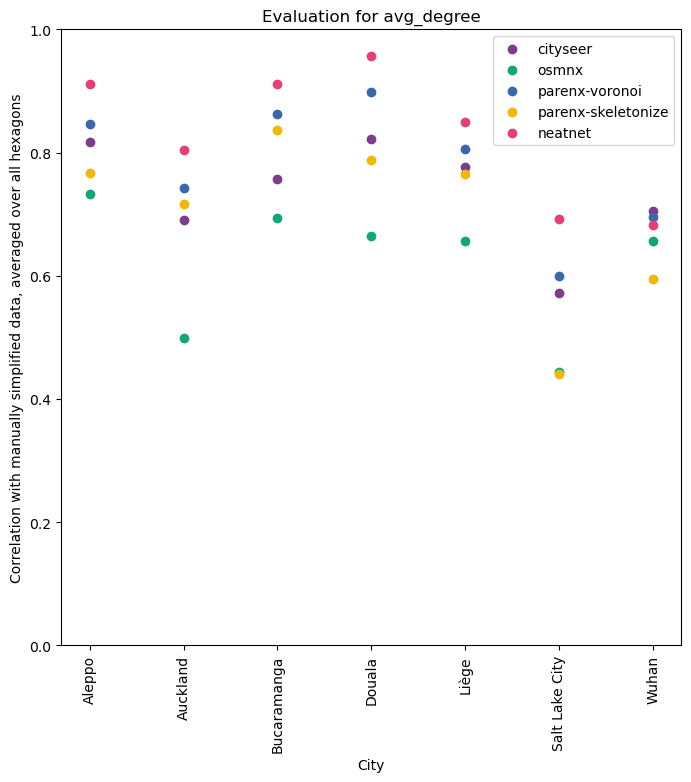

In [27]:
# markers = {
#     "cityseer": "v",
#     "osmnx": "o",
#     "parenx-voronoi": "P",
#     "parenx-skeletonize": "X",
#     "neatnet": "D",
# }

metric = "avg_degree"

fig, ax = plt.subplots(1, 1, figsize=(8, 8))

for case, row in combined.loc[metric].iterrows():
    for method in methods_to_compare:
        mylabel = None
        if case == "Aleppo":
            mylabel = method
        ax.scatter(
            xpos[case],
            row[method],
            color=colors[method],
            # marker=markers[method],
            label=mylabel,
            # alpha=0.8
        )

ax.legend(loc="upper right")
ax.set_xticks(list(xpos.values()))
ax.set_xticklabels(list(xpos.keys()), rotation=90)
ax.set_ylim(0, 1)
ax.set_xlabel("City")
ax.set_ylabel("Correlation with manually simplified data, averaged over all hexagons")
ax.set_title(f"Evaluation for {metric}")

plt.show()

**option 2: scatter+lines**

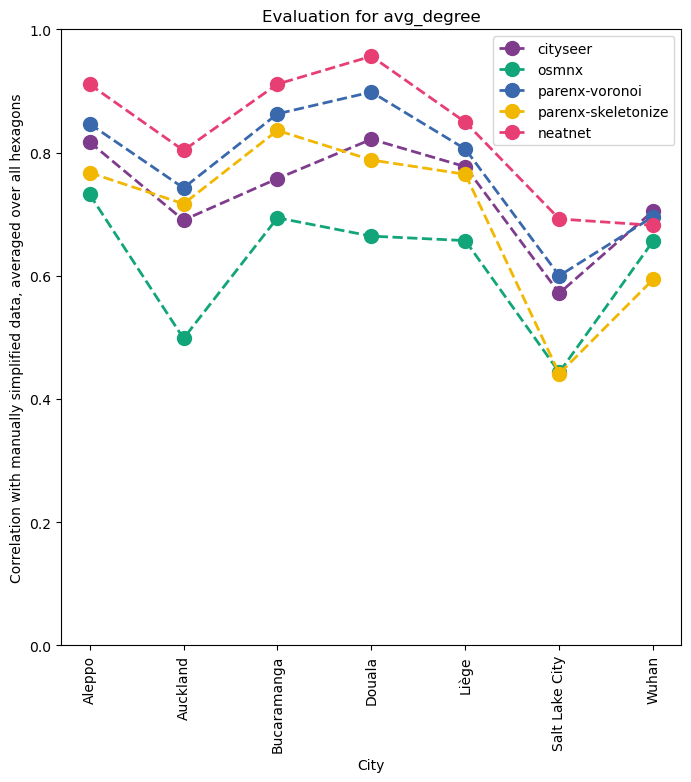

In [32]:
metric = "avg_degree"

fig, ax = plt.subplots(1, 1, figsize=(8, 8))

# for case, row in combined.loc[metric].iterrows():
#     for method in methods_to_compare:
#         mylabel = None
#         if case == "Aleppo":
#             mylabel = method
#         ax.scatter(
#             xpos[case],
#             row[method],
#             color=colors[method],
#             #marker=markers[method],
#             label=mylabel,
#             #alpha=0.8
#         )

for method in methods_to_compare:
    ax.plot(
        combined.loc[metric][method],
        color=colors[method],
        linewidth=2,
        linestyle="dashed",
        marker="o",
        markersize=10,
        label=method,
    )

ax.legend(loc="upper right")
ax.set_xticks(list(xpos.values()))
ax.set_xticklabels(list(xpos.keys()), rotation=90)
ax.set_ylim(0, 1)
ax.set_xlabel("City")
ax.set_ylabel("Correlation with manually simplified data, averaged over all hexagons")
ax.set_title(f"Evaluation for {metric}")

plt.show()

**Option 3: horizontal**

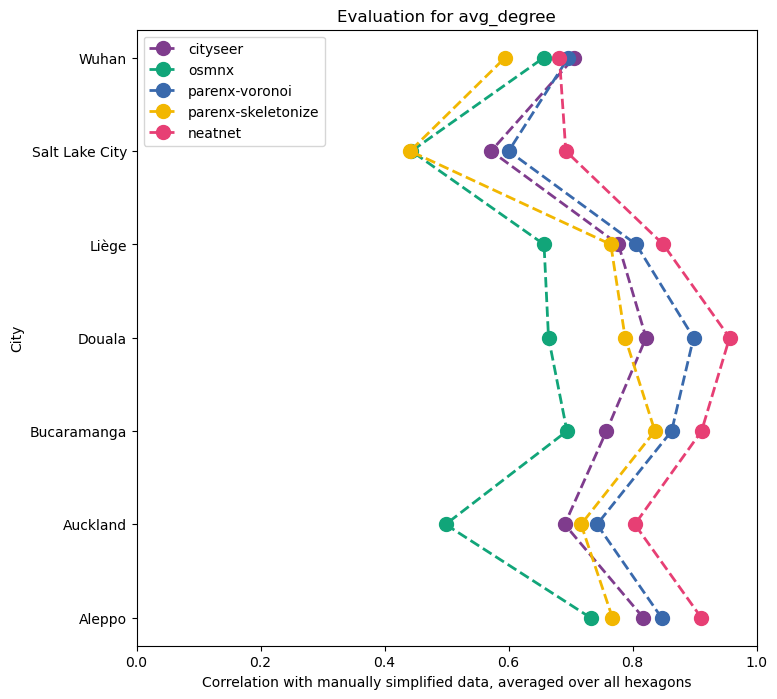

In [42]:
metric = "avg_degree"

fig, ax = plt.subplots(1, 1, figsize=(8, 8))

# for case, row in combined.loc[metric].iterrows():
#     for method in methods_to_compare:
#         mylabel = None
#         if case == "Aleppo":
#             mylabel = method
#         ax.scatter(
#             xpos[case],
#             row[method],
#             color=colors[method],
#             #marker=markers[method],
#             label=mylabel,
#             #alpha=0.8
#         )

for method in methods_to_compare:
    s = pd.Series(combined.loc[metric][method])
    ax.plot(
        s,
        list(range(len(s))),
        color=colors[method],
        linewidth=2,
        linestyle="dashed",
        marker="o",
        markersize=10,
        label=method,
    )

ax.legend(loc="upper left")
ax.set_yticks(list(xpos.values()))
ax.set_yticklabels(list(xpos.keys()), rotation=0)
ax.set_xlim(0, 1)
ax.set_ylabel("City")
ax.set_xlabel("Correlation with manually simplified data, averaged over all hexagons")
ax.set_title(f"Evaluation for {metric}")

plt.show()

**Compare all three plotting methods**

Text(0.5, 1.0, 'Evaluation for avg_degree')

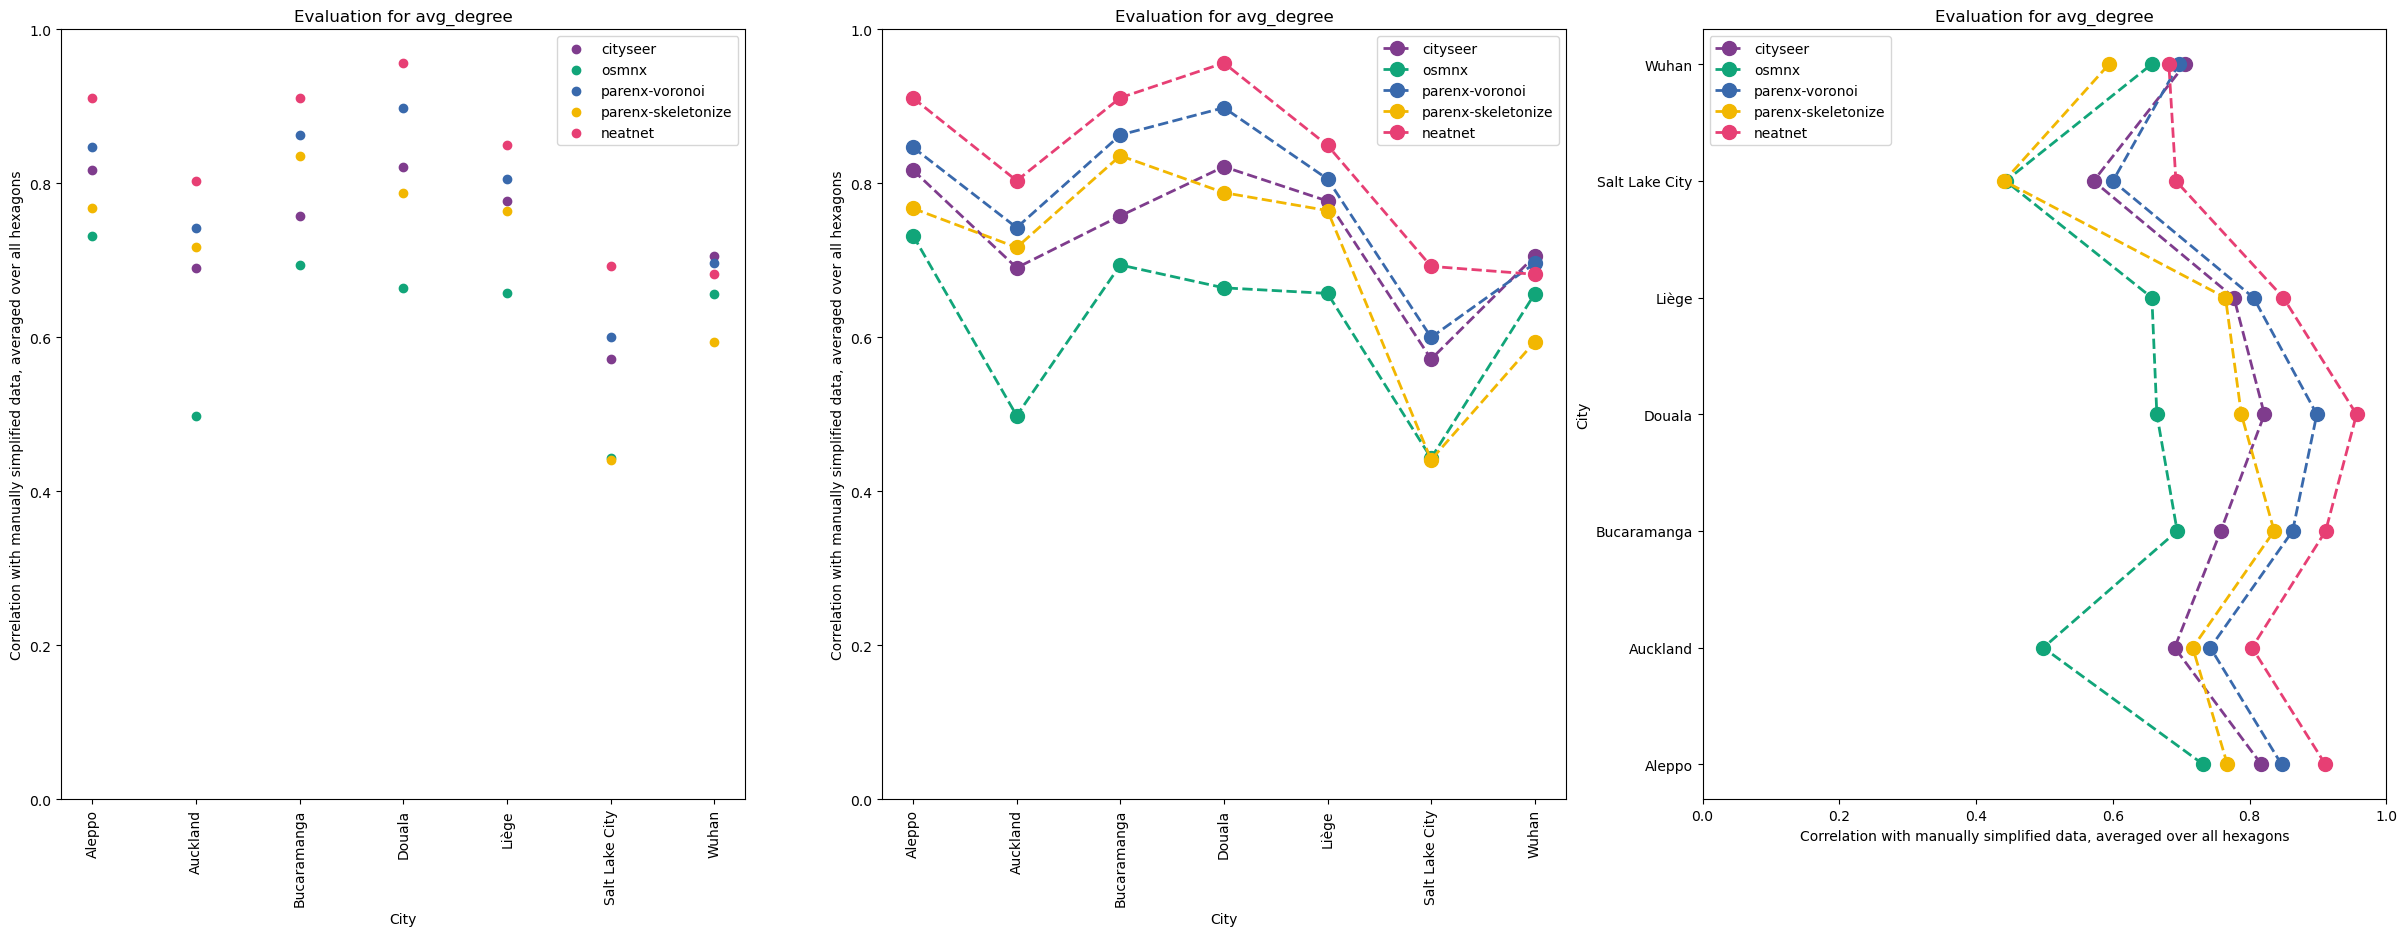

In [50]:
metric = "avg_degree"

fig, axs = plt.subplots(1, 3, figsize=(30, 10))

ax = axs[0]

for case, row in combined.loc[metric].iterrows():
    for method in methods_to_compare:
        mylabel = None
        if case == "Aleppo":
            mylabel = method
        ax.scatter(
            xpos[case],
            row[method],
            color=colors[method],
            # marker=markers[method],
            label=mylabel,
            # alpha=0.8
        )

ax.legend(loc="upper right")
ax.set_xticks(list(xpos.values()))
ax.set_xticklabels(list(xpos.keys()), rotation=90)
ax.set_ylim(0, 1)
ax.set_xlabel("City")
ax.set_ylabel("Correlation with manually simplified data, averaged over all hexagons")
ax.set_title(f"Evaluation for {metric}")

ax = axs[1]

for method in methods_to_compare:
    ax.plot(
        combined.loc[metric][method],
        color=colors[method],
        linewidth=2,
        linestyle="dashed",
        marker="o",
        markersize=10,
        label=method,
    )

ax.legend(loc="upper right")
ax.set_xticks(list(xpos.values()))
ax.set_xticklabels(list(xpos.keys()), rotation=90)
ax.set_ylim(0, 1)
ax.set_xlabel("City")
ax.set_ylabel("Correlation with manually simplified data, averaged over all hexagons")
ax.set_title(f"Evaluation for {metric}")

ax = axs[2]

for method in methods_to_compare:
    s = pd.Series(combined.loc[metric][method])
    ax.plot(
        s,
        list(range(len(s))),
        color=colors[method],
        linewidth=2,
        linestyle="dashed",
        marker="o",
        markersize=10,
        label=method,
    )

ax.legend(loc="upper left")
ax.set_yticks(list(xpos.values()))
ax.set_yticklabels(list(xpos.keys()), rotation=0)
ax.set_xlim(0, 1)
ax.set_ylabel("City")
ax.set_xlabel("Correlation with manually simplified data, averaged over all hexagons")
ax.set_title(f"Evaluation for {metric}")